<h1 align="center">YRoots</h1>

YRoots is a numerical rootfinding package to find all the real roots of a system of equations in a compact interval in $\mathbb{R}^n$ under mild assumptions on the roots.

# Installation

In Linux or a Mac terminal, download YRoots from github with the following command, while in the directory where you want YRoots installed:

  ```git
      git clone https://github.com/tylerjarvis/RootFinding/tree/master   
  ```
  
Now make the yroots module availabe to Python with: 

  ```
      pip install -e ./RootFinding
  ```
That's it.  You can use yroots in this notebook or in your own python code.

# Some examples of how to use yroots

In [2]:
#imports
import numpy as np
import yroots as yr

#plotting tools
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Multivariate Functions

To find the commmon zeros of a set of multivariate functions, input a list of functions and a search interval. The syntax for this is:

```python
yr.solve(funcs, a, b)
```

where `funcs` is a list of $n$ **vectorized** functions in $n$ variables and `a` and `b` are array-like objects of upper and lower bounds (respectively) of the search domain in each dimension. For bivariate systems, the optional parameter `plot` allows the user to graph the zero-loci and roots of the functions. The parameter `polish` can improve the accuracy for multivariate systems, using Newton's method, provided the derivatives are reliable.

YRoots returns a numpy array where each row is a root.

### Two variables, basic example
Here is an example of YRoots solving the bivariate system of equations

$$0 = \sin(xy) + x\log(y+3) - x^2 + \frac{1}{y-4}$$
$$6 = \cos(3xy) + e^{\frac{3y}{x-2}} - x.$$

Solutions of the system subject to the constrains $-1\leq x\leq0,-2\leq y\leq1$ are common roots of the functions

$$f(x,y) = \sin(xy) + x\log(y+3) - x^2 + \frac{1}{y-4} $$
$$g(x,y) = \cos(3xy) + e^{\frac{3y}{x-2}} - x - 6$$ on the search domain $[-1,0]\times[-2,1]$.

In [2]:
#define the functions
f = lambda x,y : np.sin(x*y) + x*np.log(y+3) - x**2 + 1/(y-4)
g = lambda x,y : np.cos(3*x*y) + np.exp(3*y/(x-2)) - x - 6

#search domain bounds
a = [-1,-2] #lower bounds on x and y
b = [0,1] #upper bounds on x and y


# compute the roots and time the process
%time roots = yr.solve([f,g], a, b)

print(roots)


Percent Finished: 100%                                                  
Total intervals checked was 583
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [10.2916 87.9931  1.7153  0.      0.    ]
Wall time: 2.34 s
[[-0.410034   -1.40471685]
 [-0.73720226 -1.65461673]]


Percent Finished: 100%                                                  
Total intervals checked was 583
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [10.2916 87.9931  1.7153  0.      0.    ]


<Figure size 3600x2400 with 0 Axes>

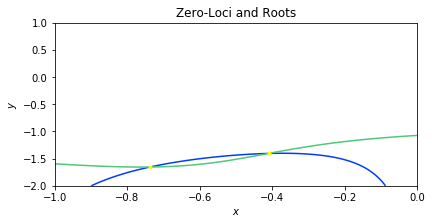

In [3]:
#Plot the zero loci of each function and the common roots

roots = yr.solve([f,g], a, b, plot=True)


How good are these estimated roots?  Let's compute residuals:

In [4]:
#Compute the residuals for each function and root
print('residuals for f are {}'.format(np.abs(f(roots[:,0],roots[:,1]))))
print('residuals for g are {}'.format(np.abs(g(roots[:,0],roots[:,1]))))

residuals for f are [1.94289029e-16 1.66533454e-16]
residuals for g are [5.32907052e-15 4.44089210e-15]


We could improve the accuracy by Yroot polishing:

In [5]:
roots = yr.solve([f,g], a, b, rel_approx_tol=[1.e-6, 1.e-8, 1.e-10], abs_approx_tol=[1.e-10, 1.e-12, 1.e-13],
                 max_cond_num=[1e6, 1e5, 1e4], macaulay_zero_tol=[1e-12, 1e-13, 1e-14], good_zeros_factor=[100, 10, 10],
                 min_good_zeros_tol=[1e-5, 1e-7, 1e-9])
#Compute the residuals for each function and root
print('residuals for f are {}'.format(np.abs(f(roots[:,0],roots[:,1]))))
print('residuals for g are {}'.format(np.abs(g(roots[:,0],roots[:,1]))))

Percent Finished: 100%                                                  
Total intervals checked was 364
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [ 0.8242 96.978   2.1978  0.      0.    ]
residuals for f are [7.49400542e-16 2.08166817e-15]
residuals for g are [1.06581410e-14 3.28626015e-14]


### Two variables, second example

Here is a slightly more complex system on the search domain $[-1,1]\times[-1,1]$ from [this paper](https://link.springer.com/article/10.1007/s00211-014-0635-z).

$$f(x,y) =\sin(30x−y/30)+y$$
$$g(x,y) =\cos(x/30−30y)−x$$

In [6]:
#functions
f = lambda x,y: np.sin(30*x-y/30)+y
g = lambda x,y: np.cos(x/30-30*y)-x
#search domain
a = [-1,-1] #lower
b = [1,1] #upper
#time
%time roots =  yr.solve([f,g], a, b)

D:\Users\Daniel\Documents\Work Research\RootFinding\yroots\polynomial.py:44: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "chebval2" failed type inference due to: Invalid use of Function(<built-in function mul>) with argument(s) of type(s): (tuple(int64 x 1), Literal[int](1))
Known signatures:
 * (int64, int64) -> int64
 * (int64, uint64) -> int64
 * (uint64, int64) -> int64
 * (uint64, uint64) -> uint64
 * (float32, float32) -> float32
 * (float64, float64) -> float64
 * (complex64, complex64) -> complex64
 * (complex128, complex128) -> complex128
 * parameterized
In definition 0:
    All templates rejected with literals.
In definition 1:
    All templates rejected without literals.
In definition 2:
    All templates rejected with literals.
In definition 3:
    All templates rejected without literals.
In definition 4:
    All templates rejected with literals.
In definition 5:
    All templates rejected without literals.
In definit

Percent Finished: 7.67%       

KeyboardInterrupt: 

In [7]:
# show the number of roots (should be 363?)
print(f'number of roots found is {roots.shape[0]}')

# print the maximal residual
print(' Maximal residual for f is {} \n Maximal residual for g is {}'. format(np.max(np.abs(f(roots[:,0],roots[:,1]))),np.max(np.abs(g(roots[:,0],roots[:,1])))))


number of roots found is 2
 Maximal residual for f is 1.5849078598114499 
 Maximal residual for g is 1.5323445782936815


So 363 real roots were found in this domain in under 7 seconds.  

Let's plot them and the zero loci:

In [8]:
# Plot the zero loci and common roots
roots =  yr.solve([f,g], a, b, plot=True)

Percent Finished: 5.13%       

KeyboardInterrupt: 

### Bivariate example #3

Here is a more complicated bivariate system on the region $[-5,5]\times[-5,5]$.

$$f(x,y) = \sin(20x+y)$$
$$g(x,y) = \cos(x^2+xy)-\frac{1}{4}$$

Notice that YRoots correctly avoids points that are nearly roots but are not roots.

In [ ]:
#define functions and search domain
f = lambda x,y : np.sin(20*x+y)
g = lambda x,y : np.cos(x**2+x*y)-.25
a = [-5,-5]
b = [5,5]

#solve and time
%time roots = yr.solve([f,g], a, b)

# print the number of roots (should be 452)
print(roots.shape[0])

# print the maximal residuals
print(' Maximal residual for f is {} \n Maximal residual for g is {}'. format(np.max(np.abs(f(roots[:,0],roots[:,1]))),np.max(np.abs(g(roots[:,0],roots[:,1])))))



In [ ]:
# Solve and plot
roots = yr.solve([f,g], a, b, plot=True)

Here is an ill-conditioned system from [this paper](https://link.springer.com/article/10.1007/s00211-014-0635-z) on the domain $[-1,1]\times[-1,1]$.

$$\Pi_{i=0}^{10}(y^2(4y^2−\frac{i}{10})−x^2(4x^2−1)) = 0$$
$$256(x^2+y^2)^2+288(x^2+y^2)−512(x^3−3xy^2)=27$$

In [ ]:
#functions
f = lambda x,y: np.prod([y**2*(4*y**2-i/10)-x**2*(4*x**2-1) for i in range(11)],axis=0)
g = lambda x,y: 256*(x**2+y**2)**2+288*(x**2+y**2)-512*(x**3-3*x*y**2)-27
#search domain
a = [-1,-1] #lower
b = [1,1] #upper
#time
%time roots = yr.solve([f,g], a, b)
roots = yr.solve([f,g], a, b, plot=True)
#show the number of roots and maximal residuals
roots.shape[0],np.max(np.abs(f(roots[:,0],roots[:,1]))),np.max(np.abs(g(roots[:,0],roots[:,1])))

### Using YRoots for optimization

YRoots can also be used for optimization problems, since the common roots of the partial derivatives of a function are critical points. 

The Rosenbrock function is often used as a performace test for optimization algorithms. It is well suited to be optimized with YRoots. 

$$f(x,y) = (1-x)^2 + 100(y-x^2)^2$$

In [ ]:
#define function
f = lambda x,y: (1-x)**2 + 100*(y-x**2)**2

#partial derivatives
fx = lambda x,y: 2*(x-1) + 200*(y-x**2)*(-2*x)
fy = lambda x,y: 200*(y-x**2)

In [ ]:
#3D plot of the function to optimize
x = np.linspace(-2,2, 1000)
y = np.linspace(-1,3, 1000)
X, Y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot_surface(X, Y, f(X,Y))

In [ ]:
#find common roots
low = [-2,-1]
upp = [2,3]
%time zeros = yr.solve([fx,fy],low,upp,plot=True, polish=True)

In [ ]:
#evaluate at critical points
values = f(zeros[:,0],zeros[:,1])
#report mimima and minimizers
mimimizer = np.argmin(values)
values[mimimizer], zeros[mimimizer]

Nick Trefethen's Hundred-dollar, Hundred-digit Challenge problems include finding the minimum of the function 
$$f(x,y) = e^{\sin(50x)} + \sin(60e^y) + \sin(70 \sin (x))+\sin(\sin(80y)) - \sin(10(x+y)) + 1/4(x^2 + y^2).$$

(Problem 4, [here](https://en.wikipedia.org/wiki/Hundred-dollar,_Hundred-digit_Challenge_problems))

In [ ]:
#define function
f = lambda x,y : np.exp(np.sin(50*x)) + np.sin(60*np.exp(y)) + np.sin(70*np.sin(x)) + np.sin(np.sin(80*y)) \
                - np.sin(10*(x+y)) + .25 * (x**2 + y**2)

#partial derivatives
fx = lambda x,y : 50*np.cos(50*x)*np.exp(np.sin(50*x)) + 70*np.cos(x)*np.cos(70*np.sin(x)) - 10*np.cos(10*(x+y)) + .5 * x
fy = lambda x,y : 60*np.exp(y)*np.cos(60*np.exp(y)) + 80*np.cos(80*y)*np.cos(np.sin(80*y))- 10*np.cos(10*(x+y)) + .5 * y

In [ ]:
#3D plot of the function to optimize
x = np.linspace(-1,1, 1000)
X, Y = np.meshgrid(x, x)

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot_surface(X, Y, f(X,Y))

In [ ]:
#find common roots
low = -np.ones(2)
upp = np.ones(2)
%time zeros = yr.solve([fx,fy],low,upp,plot=True, polish=True)

In [ ]:
#how many zeros it found
zeros.shape

In [ ]:
#maximum residuals of common roots
np.max(np.abs(fx(zeros[:,0],zeros[:,1]))),np.max(np.abs(fy(zeros[:,0],zeros[:,1])))

In [ ]:
#evaluate at critical points
values = f(zeros[:,0],zeros[:,1])
#report mimima and minimizers
mimimizer = np.argmin(values)
values[mimimizer], zeros[mimimizer]

YRoots can solve systems in higher dimensions as well. Moving forward, our goal is to increase rootfinding feasibility for high dimensional systems.

Here are examples of YRoots running on systems in three and four variables.

### Three variables, Domain $[-1,1]\times[-1,1]\times[-1,1]$

$$ f(x,y,z) = \sin(5x+y+z)$$
$$ g(x,y,z) = \sin(xyz)$$
$$ h(x,y,z) = x^2 + y^2 - z^2 - 1$$


In [ ]:
#define the functions and the search domain
f = lambda x,y,z : np.sin(5*x+y+z)
g = lambda x,y,z : np.sin(x*y*z)
h = lambda x,y,z : x**2+y**2-z**2-1
a = -np.ones(3)
b = np.ones(3)

In [ ]:
#solve and time
%time roots = yr.solve([f,g,h], a, b, polish=True)
#show the number of roots and maximal residuals
roots.shape[0],np.max(np.abs(f(*[roots[:,i] for i in range(3)]))),np.max(np.abs(g(*[roots[:,i] for i in range(3)]))),np.max(np.abs(h(*[roots[:,i] for i in range(3)])))

The code below graphs these level surfaces and their common roots (code is from [here](https://stackoverflow.com/questions/4680525/plotting-implicit-equations-in-3d)).

In [ ]:
#function for plotting level surfaces in 3D
def plot_implicit(fn, color, bbox=(-1,1)):
    ''' create a plot of an implicit function
    fn  ...implicit function (plot where fn==0)
    bbox ..the x,y,and z limits of plotted interval'''
    xmin, xmax, ymin, ymax, zmin, zmax = bbox*3
    A = np.linspace(xmin, xmax, 100) # resolution of the contour
    B = np.linspace(xmin, xmax, 15) # number of slices
    A1,A2 = np.meshgrid(A,A) # grid on which the contour is plotted

    for z in B: # plot contours in the XY plane
        X,Y = A1,A2
        Z = fn(X,Y,z)
        cset = ax.contour(X, Y, Z+z, [z], colors=color,alpha=.2,zdir='z')
        # [z] defines the only level to plot for this contour for this value of z

    for y in B: # plot contours in the XZ plane
        X,Z = A1,A2
        Y = fn(X,y,Z)
        cset = ax.contour(X, Y+y, Z, [y], colors=color,alpha=.2,zdir='y')

    for x in B: # plot contours in the YZ plane
        Y,Z = A1,A2
        X = fn(x,Y,Z)
        cset = ax.contour(X+x, Y, Z, [x], colors=color,alpha=.2,zdir='x')

    #set plot limits
    ax.set_zlim3d(zmin,zmax)
    ax.set_xlim3d(xmin,xmax)
    ax.set_ylim3d(ymin,ymax)
    
#plot each level surface individually, then together

#f
fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(631, projection='3d')
ax.scatter(*[roots[:,i] for i in range(3)],color='g')
plot_implicit(f,'r')
ax.set_title('$f(x,y,z)=0$')

#g
ax = fig.add_subplot(632, projection='3d')
ax.scatter(*[roots[:,i] for i in range(3)],color='g')
plot_implicit(g,'b')
ax.set_title('$g(x,y,z)=0$')

#h
ax = fig.add_subplot(633, projection='3d')
ax.scatter(*[roots[:,i] for i in range(3)],color='g')
plot_implicit(h,'k')
ax.set_title('$h(x,y,z)=0$')

#together
ax = fig.add_subplot(634, projection='3d')
ax.scatter(*[roots[:,i] for i in range(3)],color='g')
plot_implicit(f,'r')
plot_implicit(g,'b')
plot_implicit(h,'k')
ax.set_title('$f,g,h = 0$ and roots')

#just the roots
ax = fig.add_subplot(635, projection='3d')
ax.scatter(*[roots[:,i] for i in range(3)],color='g')
ax.set_title('roots')
ax.set_zlim3d(-1,1)
ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1,1)

## Four Variable Optimization

As a final multivariate example, we solve the following system.

$$\cos(x_1) + x_4 = 1$$
$$\cos(x_2) + x_3 = 2$$
$$\cos(x_3) + x_2 = 3$$
$$\cos(x_4) + x_1 = 4$$

In [ ]:
#functions
f1 = lambda x1, x2, x3, x4: np.cos(x1) + x4 - 1
f2 = lambda x1, x2, x3, x4: np.cos(x2) + x3 - 2
f3 = lambda x1, x2, x3, x4: np.cos(x3) + x2 - 3
f4 = lambda x1, x2, x3, x4: np.cos(x4) + x1 - 4

#domain
a = [4,3.5,2,1.5]
b = [4.5,4,3,2]

#solve and time
%time roots = yr.solve([f1,f2,f3,f4],a,b,polish=True)

#number of roots and maximum residual
roots.shape[0],np.max([np.abs(f(*[roots[:,i] for i in range(4)])) for f in [f1,f2,f3,f4]])

### Univariate Functions

The `yr.solve` method can also be used to quickly find the roots of a univariate function. In this case, `a` and `b` can simply be entered as floats, and the `funcs` does not need to be a list.

As an example, we find the zeros of $f(x) = \sin(e^{3x})$ on $[-1,2]$.

Percent Finished: 100%                                                  
Total intervals checked was 13
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [  0.   0.   0. 100.   0.]


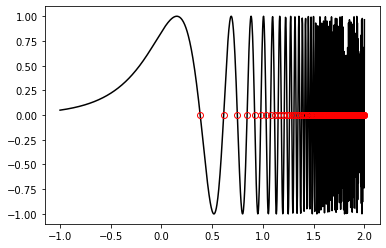

Wall time: 296 ms


(128, 1.2216448847489865e-12)

In [4]:
#define the function and search interval
f = lambda x : np.sin(np.exp(3*x))

a = -1
b = 2

#solve and time
%time roots = yr.solve(f, a, b, 1e-12, 1e-12, 1e10, 0, 100, 1e-5, plot=True)
#show the number of roots and maximal residuals
roots.size,np.max(np.abs(f(roots)))

## Polynomials

When a function in a system is a polynomial, it may be useful to pass it in as a YRoots's `Polynomial` object. `Polynomial` objects may be more cumbersome to create, but they have a special `evaluate_grid` method which allows for faster Chebyshev-approximations.

If the system only includes `Polynomial` objects, it may be preferable to use the alternative `yr.polysolve` method which does not rely on Chebyshev approximations. The gains in speed depend on the degree and dimension of the system. Heuristically, these methods are faster than `yr.solve` for lower degree polynomial systems, but **these methods are only stable for roots where each coordinate has absolute value $< 1$.**

We demonstrate how to create `Polynomial` objects and how to use `yr.polysolve`.

### YRoot Polynomials

The two types of `Polynomial` objects are `MultiPower` and `MultiCheb`, corresponding to multivariate polynomials in the power basis and Chebyshev basis respectively. 
Polynomials in $n$-dimensions are represented by an $n$-dimensional array of coefficients. For a system with three variables, the $(i,j,k)$ spot in the coefficient tensor corresponds to the coefficients of $x^iy^jz^k$ in the power basis or $T_i(x)T_j(y)T_k(z)$ in the Chebyshev basis. It is probably easiest to construct this coefficient tensor by initializing a tensor of zeros and then setting each nonzero coefficient to the correct value.

For example, $f(x,y) = 5x^3 + 4 xy^2 + 3x^2 + 2y^2 + 1$ would be initialized as 
```python
coeff = np.zeros((4,4)) #4x4 matrix because it's a degree 3 polynomial
coeff[3,0] = 5
coeff[1,2] = 4
coeff[2,0] = 3
coeff[0,2] = 2
coeff[0,0] = 1
f = yr.MultiPower(coeff)```
                         
and $g(x,y,z) = 3T_1(x)T_2(y) + 5 T_2(z) + 2$ would be initialized as

```python
coeff = np.zeros((4,4,4))
coeff[1,2,0] = 3
coeff[0,0,5] = 5
coeff[0,0,0] = 2
g = yr.MultiCheb(coeff)```

### Polysolve

The function `yr.polysolve` has many options for polynomial rootfinding, but the default parameters are the most robust for most systems. The syntax is

```python
yr.polysolve(polys)```

where `polys` is a list of polynomial objects. All of the polynomials must be represented in the same basis. For systems that come from Chebyshev approximations, it may be better to add the optional parameter `MSmatrix=-1`.

As mentioned above, Polysolve is **only stable for finding roots where each coordinate has absolute value $< 1$.** Other roots near this region may be accurate, but how far away you can go before loosing accuracy depends on the degrees of the polynomials. By default, the system returns all the roots. To return only the roots which are guaranteed to be computed stably, use the optional parameter `return_all_roots=False`.

Additionally, while `yr.solve` only finds real roots, `yr.polysolve` finds complex roots as well. 

Below, we find the common roots of 

$$f(x,y) = y^2 + 3xy - 4x +1$$
$$g(x,y) = -6xy -2x^2 + 6y +3.$$


In [3]:
#direct construction of polynomials with coefficient tensors
f = yr.MultiPower(np.array([[1, -4, 0],[0, 3, 0],[1, 0, 0]]))
g = yr.MultiPower(np.array([[3, 0, -2],[6, -6, 0],[0, 0, 0]]))

#solve and time
%time roots = yr.polysolve([f,g], return_all_roots=True)
#show the number of roots and maximal residuals
roots.shape[0],np.max(np.abs(f(roots))),np.max(np.abs(g(roots)))

D:\Users\Daniel\Documents\Work Research\RootFinding\yroots\polynomial.py:18: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "polyval2" failed type inference due to: Invalid use of Function(<built-in function mul>) with argument(s) of type(s): (tuple(int64 x 1), Literal[int](1))
Known signatures:
 * (int64, int64) -> int64
 * (int64, uint64) -> int64
 * (uint64, int64) -> int64
 * (uint64, uint64) -> uint64
 * (float32, float32) -> float32
 * (float64, float64) -> float64
 * (complex64, complex64) -> complex64
 * (complex128, complex128) -> complex128
 * parameterized
In definition 0:
    All templates rejected with literals.
In definition 1:
    All templates rejected without literals.
In definition 2:
    All templates rejected with literals.
In definition 3:
    All templates rejected without literals.
In definition 4:
    All templates rejected with literals.
In definition 5:
    All templates rejected without literals.
In definit

Wall time: 1.33 s


D:\Users\Daniel\Documents\Work Research\RootFinding\yroots\polynomial.py:18: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "polyval2" failed type inference due to: Invalid use of Function(<built-in function mul>) with argument(s) of type(s): (tuple(int64 x 1), Literal[int](1))
Known signatures:
 * (int64, int64) -> int64
 * (int64, uint64) -> int64
 * (uint64, int64) -> int64
 * (uint64, uint64) -> uint64
 * (float32, float32) -> float32
 * (float64, float64) -> float64
 * (complex64, complex64) -> complex64
 * (complex128, complex128) -> complex128
 * parameterized
In definition 0:
    All templates rejected with literals.
In definition 1:
    All templates rejected without literals.
In definition 2:
    All templates rejected with literals.
In definition 3:
    All templates rejected without literals.
In definition 4:
    All templates rejected with literals.
In definition 5:
    All templates rejected without literals.
In definit

(4, 8.881784197001252e-16, 1.0658141036401503e-14)

D:\Users\Daniel\Documents\Work Research\RootFinding\yroots\polynomial.py:18: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "polyval2" failed type inference due to: Invalid use of Function(<built-in function mul>) with argument(s) of type(s): (tuple(int64 x 1), Literal[int](2))
Known signatures:
 * (int64, int64) -> int64
 * (int64, uint64) -> int64
 * (uint64, int64) -> int64
 * (uint64, uint64) -> uint64
 * (float32, float32) -> float32
 * (float64, float64) -> float64
 * (complex64, complex64) -> complex64
 * (complex128, complex128) -> complex128
 * parameterized
In definition 0:
    All templates rejected with literals.
In definition 1:
    All templates rejected without literals.
In definition 2:
    All templates rejected with literals.
In definition 3:
    All templates rejected without literals.
In definition 4:
    All templates rejected with literals.
In definition 5:
    All templates rejected without literals.
In definit

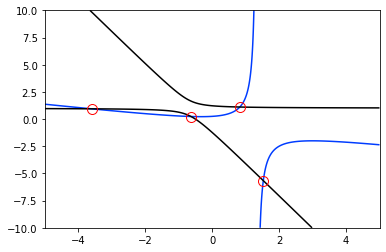

In [4]:
#plot f,g and roots
x = np.linspace(-5,5,1000)
y = np.linspace(-10,10,1000)
X,Y = np.meshgrid(x,y)
plt.contour(X,Y,f(np.array(list(zip(X,Y)))),levels=[0],colors='#003cff')
plt.contour(X,Y,g(np.array(list(zip(X,Y)))),levels=[0],colors='k')
plt.plot(roots[:,0],roots[:,1],'o',color='none',markeredgecolor='r',markersize=10)

In this case, the polynomias are of low degree, so even the roots outside the interval $[-1,1]\times[-1,1]$ are accurate.

We now find the common roots of the randomly generated polynomials higher degree polynomials A and B. In the first case, we return all the complex roots Polyroots found, and in the second we only return roots in the unit box.

In [5]:
#get three random 2D polynomials of a certain degree in the power basis
degree = 20
np.random.seed(23)
A = yr.MultiPower(np.random.rand(degree,degree))
B = yr.MultiPower(np.random.rand(degree,degree))

#A and B will have roots at infinity (which yr.polysolve cannot yet handle) 
# unless their coefficient matrices are upper left triangular
A = yr.MultiPower(np.fliplr(np.triu(np.fliplr(A.coeff))))
B = yr.MultiPower(np.fliplr(np.triu(np.fliplr(B.coeff))))

In [6]:
#All roots
#solve and time
%time roots = yr.polysolve([A,B], return_all_roots=True)
#show the number of roots and maximal residuals
roots.shape[0],np.max(A(roots)),np.max(B(roots))

D:\Users\Daniel\Documents\Work Research\RootFinding\yroots\polynomial.py:18: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "polyval2" failed type inference due to: Invalid use of Function(<built-in function mul>) with argument(s) of type(s): (tuple(int64 x 1), Literal[int](1))
Known signatures:
 * (int64, int64) -> int64
 * (int64, uint64) -> int64
 * (uint64, int64) -> int64
 * (uint64, uint64) -> uint64
 * (float32, float32) -> float32
 * (float64, float64) -> float64
 * (complex64, complex64) -> complex64
 * (complex128, complex128) -> complex128
 * parameterized
In definition 0:
    All templates rejected with literals.
In definition 1:
    All templates rejected without literals.
In definition 2:
    All templates rejected with literals.
In definition 3:
    All templates rejected without literals.
In definition 4:
    All templates rejected with literals.
In definition 5:
    All templates rejected without literals.
In definit

Wall time: 35 s


D:\Users\Daniel\Documents\Work Research\RootFinding\yroots\polynomial.py:18: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "polyval2" failed type inference due to: Invalid use of Function(<built-in function mul>) with argument(s) of type(s): (tuple(int64 x 1), Literal[int](1))
Known signatures:
 * (int64, int64) -> int64
 * (int64, uint64) -> int64
 * (uint64, int64) -> int64
 * (uint64, uint64) -> uint64
 * (float32, float32) -> float32
 * (float64, float64) -> float64
 * (complex64, complex64) -> complex64
 * (complex128, complex128) -> complex128
 * parameterized
In definition 0:
    All templates rejected with literals.
In definition 1:
    All templates rejected without literals.
In definition 2:
    All templates rejected with literals.
In definition 3:
    All templates rejected without literals.
In definition 4:
    All templates rejected with literals.
In definition 5:
    All templates rejected without literals.
In definit

(361,
 (4157.4144769272125+3576.533347848937j),
 (1.4194783432639069+0.8052419000101696j))

In [8]:
#Roots in unit box
#solve and time
%time accurate_roots = yr.polysolve([A,B],return_all_roots=False)
#show the number of roots and maximal residuals
accurate_roots.shape[0],np.max(A(accurate_roots)),np.max(B(accurate_roots))

IndexError: boolean index did not match indexed array along dimension 0; dimension is 361 but corresponding boolean dimension is 2

NameError: name 'accurate_roots' is not defined

Clearly, roots in the unit interval are more accurate for these higher degree systems. Still, real roots outside the region are visually perfect.

D:\Users\Daniel\Documents\Work Research\RootFinding\yroots\polynomial.py:18: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "polyval2" failed type inference due to: Invalid use of Function(<built-in function mul>) with argument(s) of type(s): (tuple(int64 x 1), Literal[int](2))
Known signatures:
 * (int64, int64) -> int64
 * (int64, uint64) -> int64
 * (uint64, int64) -> int64
 * (uint64, uint64) -> uint64
 * (float32, float32) -> float32
 * (float64, float64) -> float64
 * (complex64, complex64) -> complex64
 * (complex128, complex128) -> complex128
 * parameterized
In definition 0:
    All templates rejected with literals.
In definition 1:
    All templates rejected without literals.
In definition 2:
    All templates rejected with literals.
In definition 3:
    All templates rejected without literals.
In definition 4:
    All templates rejected with literals.
In definition 5:
    All templates rejected without literals.
In definit

array([[-1.58861753+0.j,  1.66013536+0.j],
       [ 0.57896567+0.j, -1.31114742+0.j],
       [-0.04542403+0.j, -1.12553814+0.j],
       [ 1.26050846+0.j, -1.25135341+0.j],
       [ 0.98242469+0.j, -1.11103665+0.j],
       [-0.96512672+0.j,  0.76684634+0.j],
       [-0.38087033+0.j, -0.43197629+0.j]])

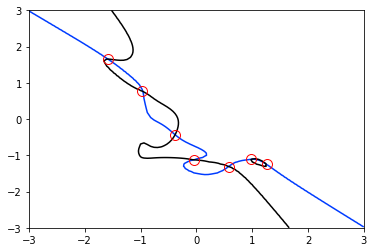

In [9]:
#plot A,B and real roots
x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100)
X,Y = np.meshgrid(x,y)
plt.contour(X,Y,A(np.array(list(zip(X,Y)))),levels=[0],colors='#003cff')
plt.contour(X,Y,B(np.array(list(zip(X,Y)))),levels=[0],colors='k')
#plot only the real roots
real_roots = roots[np.all(np.abs(roots.imag) < 1.e-10,axis = 1)]
plt.plot(np.real(real_roots[:,0]),np.real(real_roots[:,1]),'o',color='none',markeredgecolor='r',markersize=10)
real_roots

# YRoots Logo

In [ ]:
#making logo
one = lambda x,y: (y-.8)*(10*x+2.3)-.06*(2.5*x+2.3)**3+2+.2*np.sin(50*x)+.2*np.cos(50*y)
two = lambda x,y: (y-.8)*(-10*x+2.3)-.06*(-2.5*x+2.3)**3+2+.2*np.sin(50*x)+.2*np.cos(50*y)

In [ ]:
%time zeros = yr.solve([one,two],-np.ones(2),np.ones(2),plot=True,plot_intervals=True, polish=True)
#show the number of roots and maximal residuals
zeros.shape[0],np.max(np.abs(one(zeros[:,0],zeros[:,1]))),np.max(np.abs(two(zeros[:,0],zeros[:,1])))